# <center><h1><b><font color ='Green'> Image Classification using CNN </b> </font> </h1><center>

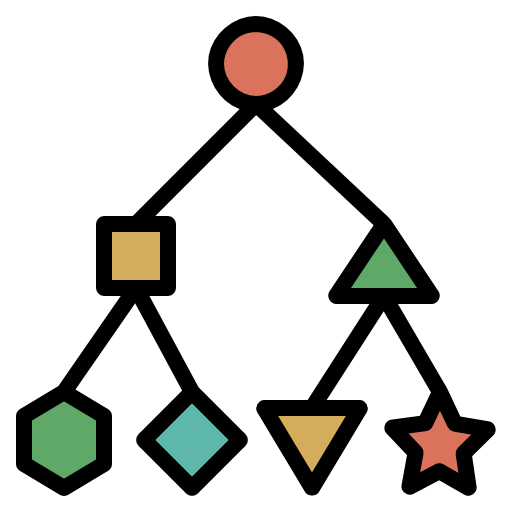

## Importing Libraries 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import tensorflow
import cv2
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

## Importing Dataset

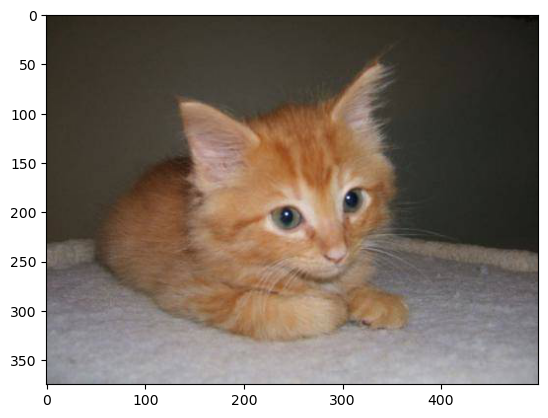

In [2]:
#class 0 - Cats, class 1- Daisy
DATASET_PATH = 'training_set'
image_cls = ['Cats', 'Dogs']

# glob through the directory (returns a list of all file paths)
image_path = os.path.join(DATASET_PATH, image_cls[0], '*')
image_path = glob.glob(image_path)

# access some element (a file) from the list
image = plt.imread(image_path[251])
plt.imshow(image)


Text(0.5, 0.98, 'Different Channels of Image')

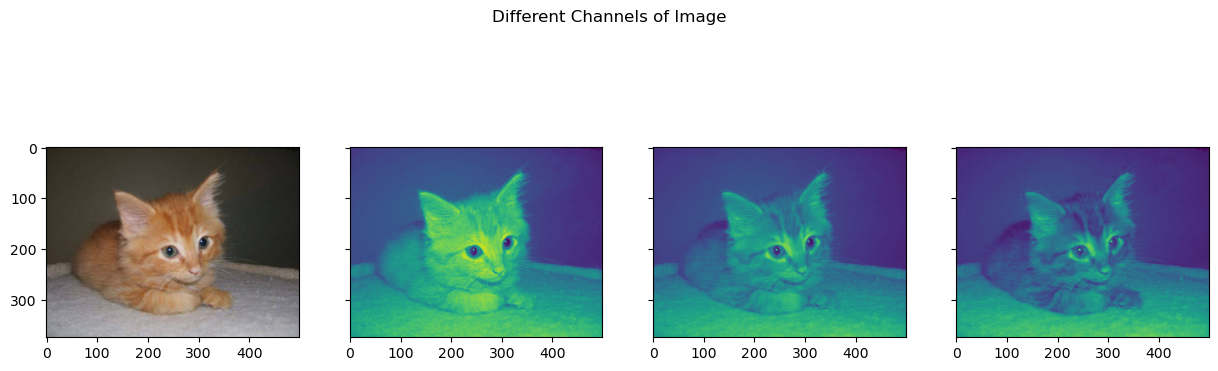

In [3]:
# plotting the original image and the RGB channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)

# RGB channels
# CHANNELID : 0 for Red, 1 for Green, 2 for Blue. 
ax2.imshow(image[:, : , 0]) #Red
ax3.imshow(image[:, : , 1]) #Green
ax4.imshow(image[:, : , 2]) #Blue
f.suptitle('Different Channels of Image')

## Spliting The Data

In [4]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory("training_set", target_size=(64,64),batch_size=32, class_mode='binary')

Found 1608 images belonging to 2 classes.


In [5]:
test_data = ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('test_set', target_size=(64,64), batch_size=32,class_mode='binary')

Found 408 images belonging to 2 classes.


## Building The Model

In [6]:
#Initialize CNN
ConvNet = tf.keras.models.Sequential()

In [7]:
#Convolution
ConvNet.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
#Max Pooling
ConvNet.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#Second Convolution Layer
ConvNet.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
ConvNet.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#Flattening
ConvNet.add(tf.keras.layers.Flatten())
#Fully Connected Layer
ConvNet.add(tf.keras.layers.Dense(units=128,activation='relu'))
#Output Layer
ConvNet.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [8]:
#Compiling
ConvNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Training
history=ConvNet.fit(x = train_set, validation_data = test_set, epochs = 300)

Epoch 1/300
51/51 [==============================] - 6s 115ms/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 2.2041 - val_accuracy: 0.7206
Epoch 2/300
51/51 [==============================] - 5s 106ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 2.2674 - val_accuracy: 0.7230
Epoch 3/300
51/51 [==============================] - 5s 107ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 2.2234 - val_accuracy: 0.7206
Epoch 4/300
51/51 [==============================] - 5s 97ms/step - loss: 0.0153 - accuracy: 0.9932 - val_loss: 2.1911 - val_accuracy: 0.7304
Epoch 5/300
51/51 [==============================] - 5s 94ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 2.1060 - val_accuracy: 0.7549
Epoch 6/300
51/51 [==============================] - 5s 97ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.1603 - val_accuracy: 0.7500
Epoch 7/300
51/51 [==============================] - 5s 102ms/step - loss: 0.0038 - accuracy: 0.9981 - val_loss: 2.2570 - val_accuracy: 0.7304
Ep

13/13 - 1s - loss: 2.8351 - accuracy: 0.7304 - 596ms/epoch - 46ms/step


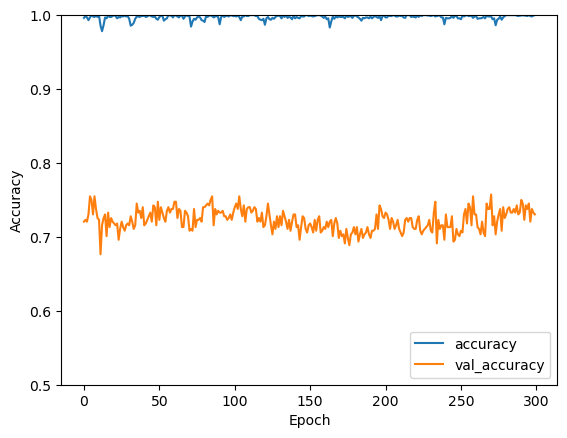

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = ConvNet.evaluate(test_set, verbose=2)

In [26]:
#To check the class indices of Dogs & Cats 
train_set.class_indices

{'cats': 0, 'dogs': 1}

## Testing The Model

In [27]:
#Since the input of the image is in a batch, 1st index ~ batch index & 2nd index ~ index of the
#ith index in the batch ([0][0] ~ because in this prediction we have 1 batch and 1 image)
if image_cls[0][0]==1:
    Animal = 'Dog'
else:
    Animal = 'Cat'

print(Animal)

Cat


## **save trained model**

In [28]:
from keras.models import load_model
ConvNet.save('model.h5')
model_final = load_model('model.h5')

In [29]:
model_final

In [30]:
new_model = tf.keras.models.load_model('model.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8